### Student Information
Name: Daniel Kong

Student ID: 110062425

GitHub ID: drainvers

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## Part 1: Take-home Exercises

In [1]:
# We run some important cells to make sure the exercises work here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> **Exercise 2 (take home)**

In [7]:
#Answer here

from IPython.display import display

# Query can be used to implement pandas indexing methods in a human readable way

# selecting rows using isin
# display(X[X['category'].isin([0,2])])
display(X.query('category == [0, 2]'))

# using boolean indexing
# display(X[(X['category'] == 1) | (X['category'] == 3)])
display(X.query('(category == 1) | (category == 3)'))

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
12     alt.atheism  
13     alt.atheism  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[1074 rows x 3 columns]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2242           comp.graphics  
2246  soc.religion.christian  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  

[1183 rows x 3 columns]

### >>> **Exercise 5 (take home)**

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer:**

To quote the Pandas documentation, `isnull()` takes a scalar or array-like object
and indicates whether values are missing (NaN in numeric arrays, None or NaN
in object arrays, NaT in datetimelike).

Since rows with ids C, D, and F are strings and not the NaN/None objects Pandas
expects, isnull does not consider them as null/missing values. They would have
to be converted to NaN objects before isnull can flag them as missing.

### >>> **Exercise 6 (take home)**

In [10]:
X_sample = X.sample(n=1000) #random state

In [11]:
# Answer here
# Statistical properties of X
display(X.describe())
display(X.info())

# Statistical properties of X_sample
display(X_sample.describe())
display(X_sample.info())

# Compare first 10 entries
display(X.head(10))
display(X_sample.head(10))

category
count  2257.000000
mean      1.581303
std       1.095472
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB


None

category
count  1000.000000
mean      1.610000
std       1.092288
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2230 to 546
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1000 non-null   object
 1   category       1000 non-null   int64 
 2   category_name  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB


None

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

text  category  \
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
858   From:  Club@spektr.msk.su (Koltovoy Nikolay Al...         1   
1187  From: noye@midway.uchicago.edu (vera shanti no...         3   
1926  From: tron@fafnir.la.locus.com (Michael Trofim...         2   
983   From: mary@uicsl.csl.uiuc.edu (Mary E. Allison...         2   
1682  From: atterlep@vela.acs.oakland.edu (Cardinal ...         3   
1935  From: bil@okcforum.osrhe.edu (Bill Conner) Sub...         0   
1219  From: nichael@bbn.com (Nichael Cramer) Subject...         3   
1566  From: gchin@ssf.Eng.Sun.COM (Gary Chin) Subjec...         3   
156   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
2230  soc.religion.christian  
858            comp.graphics  
1187  soc.religion.christian  
1926                 sci.med  
983                  sci.med  
1682  soc.religion.christian  
1935             alt.atheism  
1219  soc.religion.christian  
1566  soc.religion.christian  
156                  sci.med

**Answer:**
1. The size of the dataframe is different (2257 entries vs. 1000 entries)
2. The ordering of the index in X_sample is jumbled (a result of shuffling in the process of sampling)
3. The mean and standard deviation of the dataframes are different (but not far off because sampling preserves statistical properties of the original dataset)

### >>> **Exercise 8 (take home)**

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Category distribution'}>

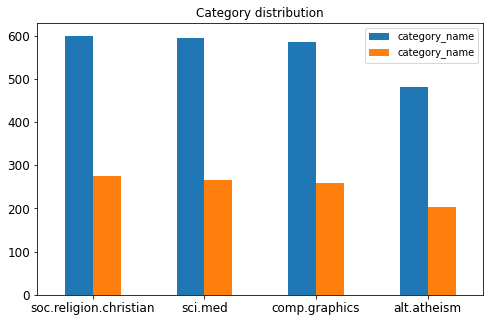

In [13]:
# Answer here

# Putting the value counts in a single dataframe we can plot from results in a simpler solution
df_value_counts = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
df_value_counts.plot(kind = 'bar',
                     title = 'Category distribution',
                     rot = 0, fontsize = 12, figsize = (8,5))

### >>> **Exercise 10 (take home)**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [15]:
# Answer here
fifth_rec = X_counts[4, 0:100].toarray()
res = np.where(fifth_rec == 1)

print(count_vect.get_feature_names()[res[1][1]])

01


C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **>>> Exercise 11 (take home):** 

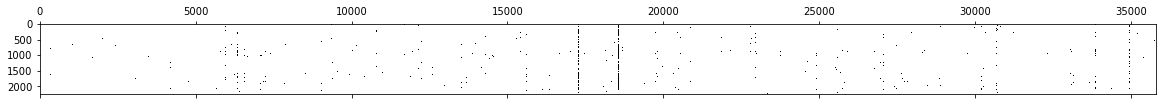

In [16]:
# Answer here
# We perform a sparse plot to see the sparsity of the data
import seaborn as sns

plt.subplots(figsize=(20,20))
plt.spy(X_counts.toarray())

**Answer:**

As we can see here, the data is extremely sparse. In order to create a more meaningful visualization, we will need to drop terms that very rarely appear in documents. We can use the `min_df` parameter when creating a new `CountVectorizer` to only include words that appear in at least a certain number of documents. Since `X_sample` still runs slowly when generating the heatmap, we take an even smaller sample.

In [17]:
X_smaller_sample = X.sample(n=200)
count_vect_min = CountVectorizer(min_df=50)
X_min_counts = count_vect_min.fit_transform(X_smaller_sample.text)

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


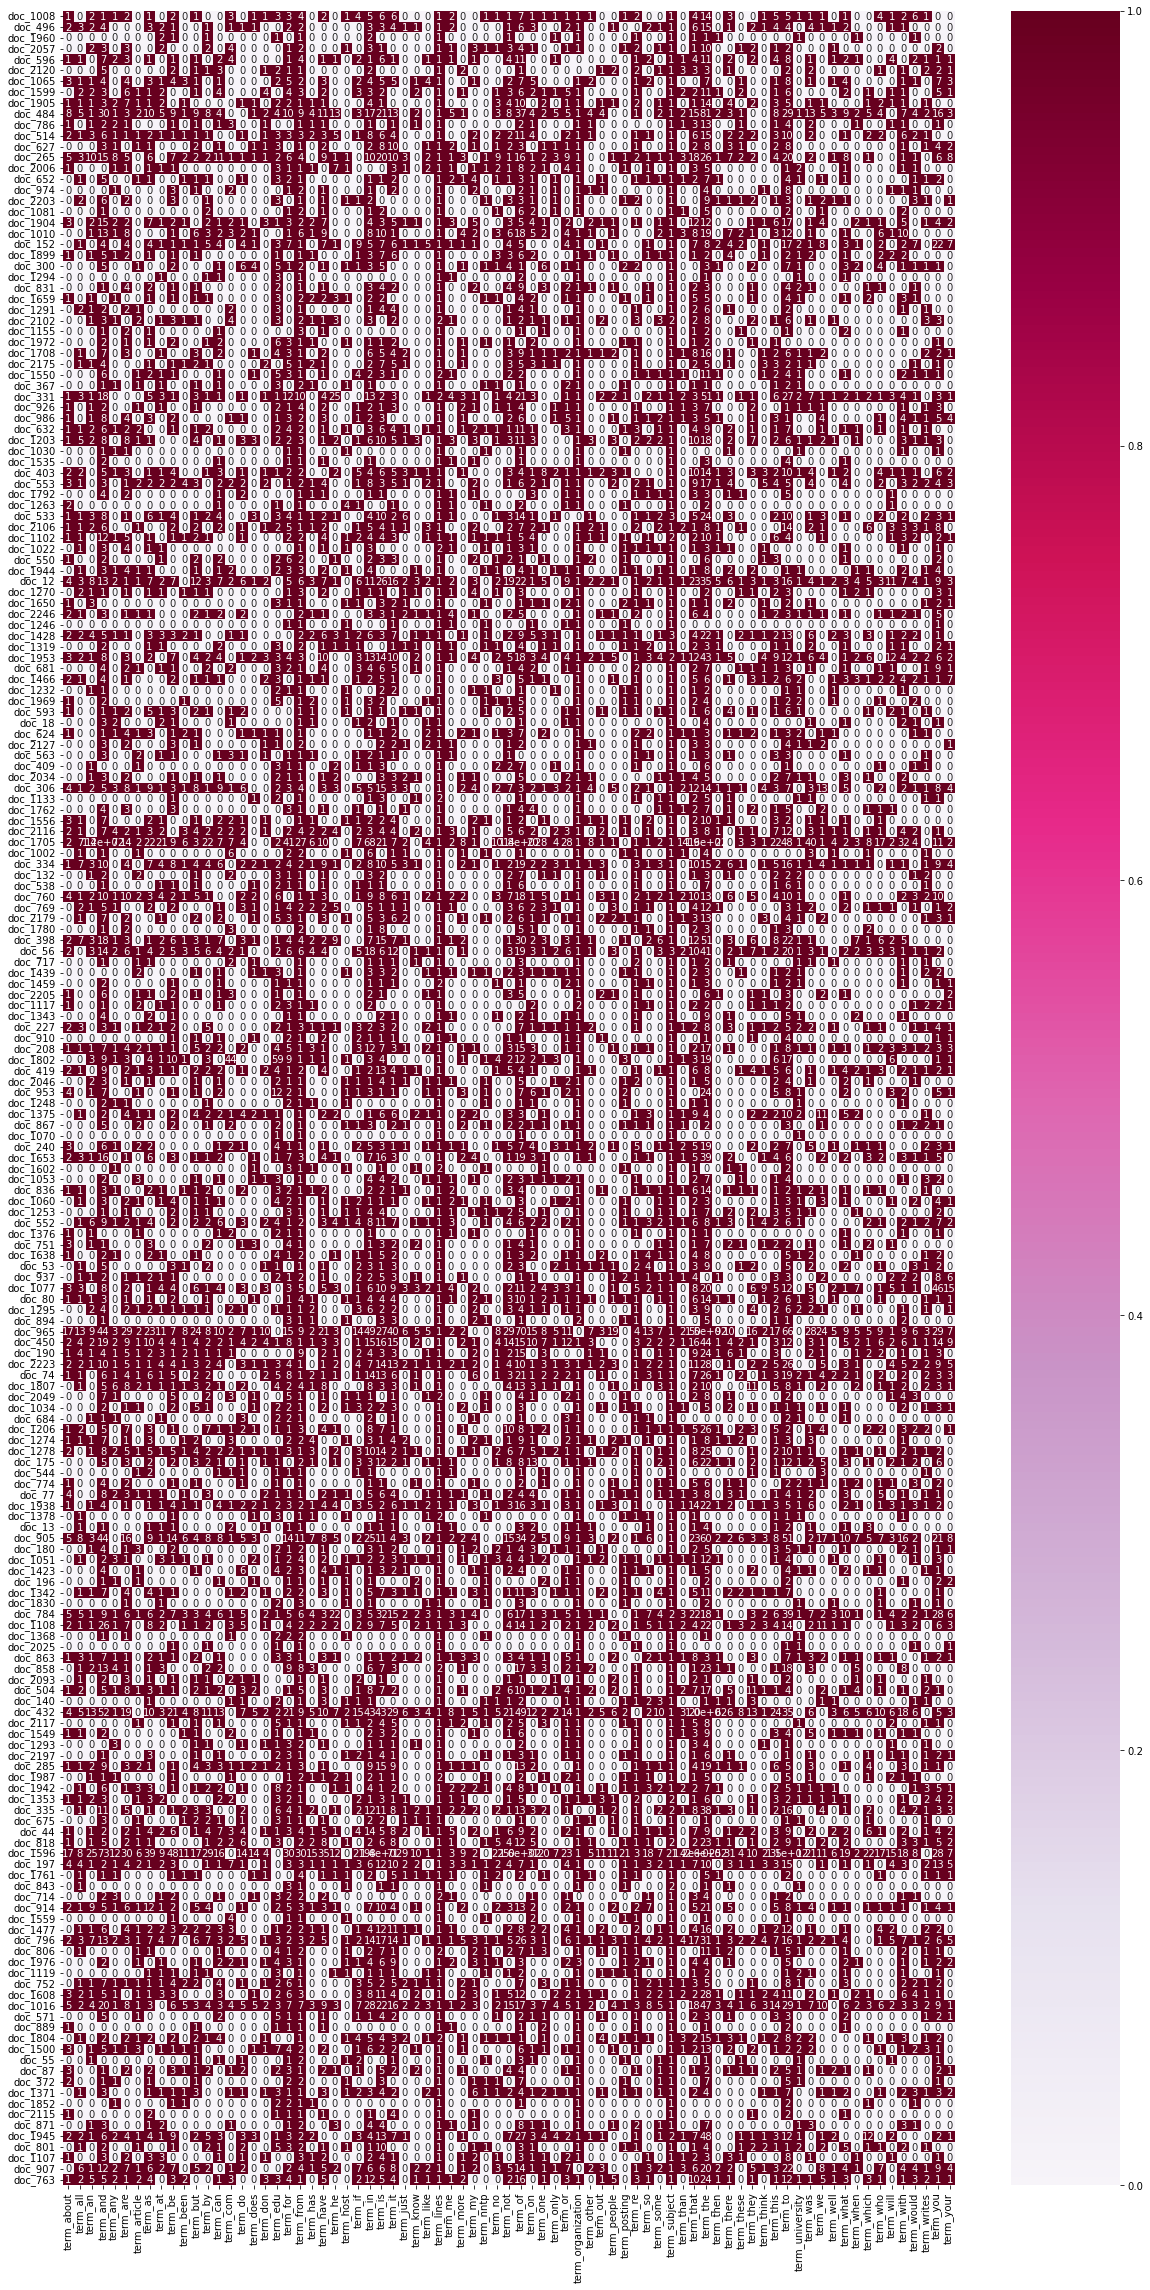

In [18]:
term_names = ["term_"+str(i) for i in count_vect_min.get_feature_names()]
doc_indices = ["doc_"+ str(i) for i in list(X_smaller_sample.index)]
docfreq_matrix = X_min_counts.toarray()

min_heatmap = pd.DataFrame(docfreq_matrix, columns = term_names, index = doc_indices)
plt.subplots(figsize=(20, 40))
ax = sns.heatmap(min_heatmap,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [19]:
from sklearn.decomposition import PCA

In [20]:
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

**Answer:**

In spite of the limitations of the rotation method, we are able to observe clearer separation than on a 2D graph.

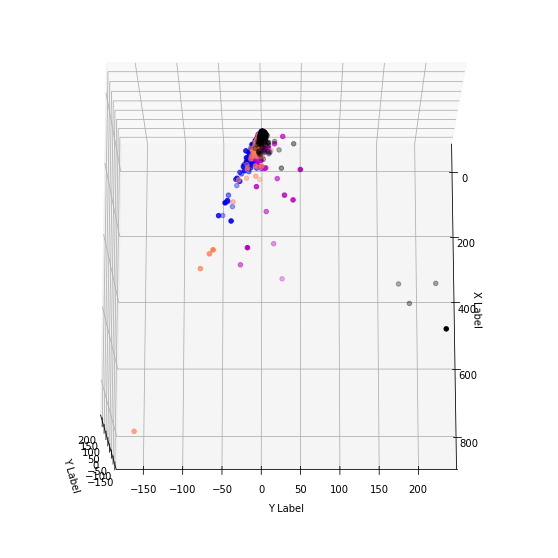

In [21]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

ax.view_init(75, 0)

plt.show()

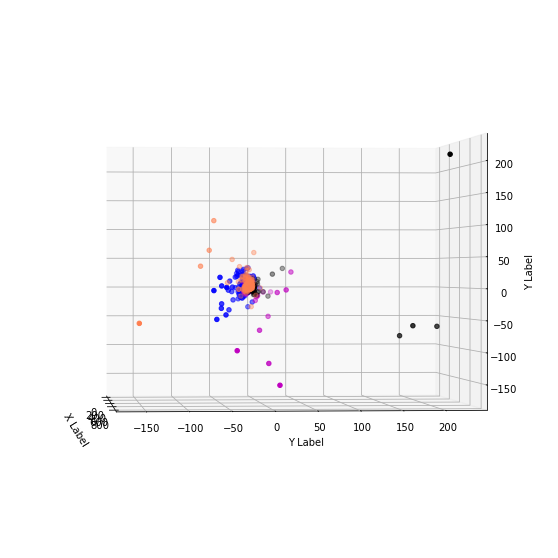

In [22]:
# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

ax.view_init(0, -5)

plt.show()

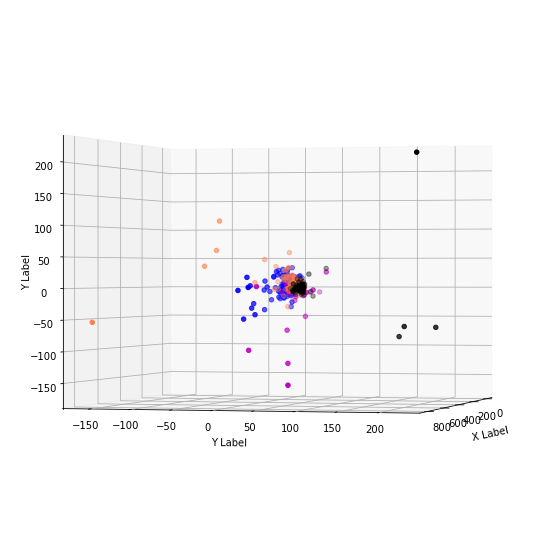

In [23]:
# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nY Label')

ax.view_init(0, 15)

plt.show()

### >>> **Exercise 13 (take home):**

In [24]:
# Sum up all columns
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [25]:
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names()[:300],
             y=term_frequencies[:300],
             template="seaborn")
fig.show()

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### >>> **Exercise 14 (take home):**

In [26]:
# Answer here
count_vect_reduced = CountVectorizer(min_df=250)
X_reduced_counts = count_vect_reduced.fit_transform(X.text)
term_frequencies_reduced = np.asarray(X_reduced_counts.sum(axis=0))[0]

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



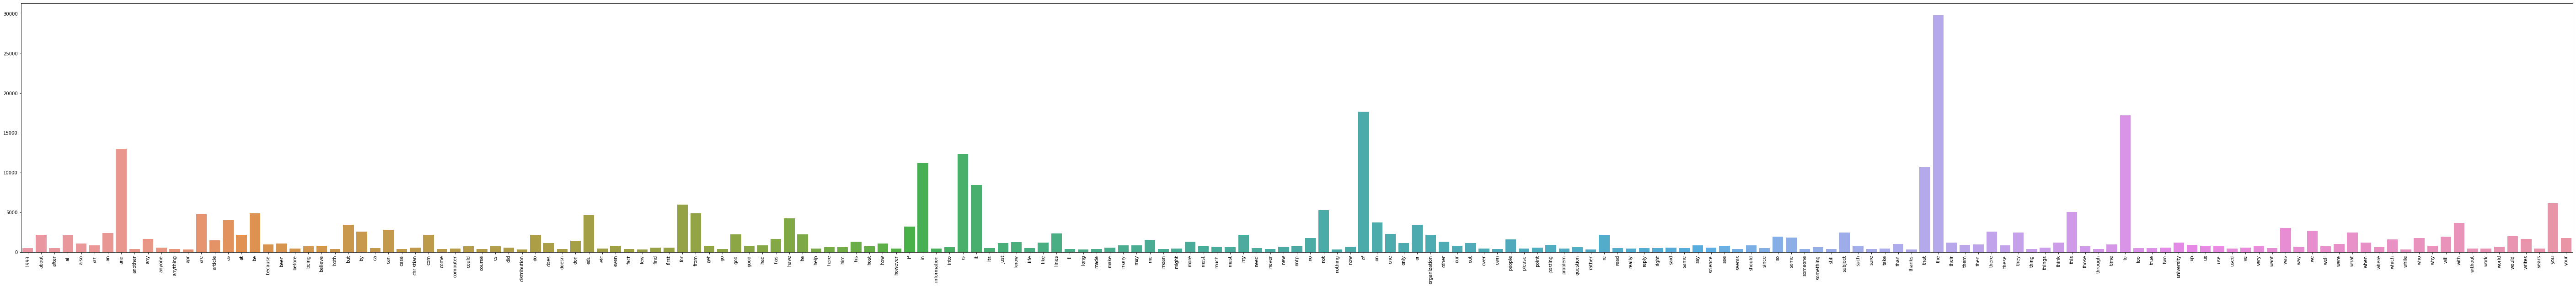

In [27]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_reduced.get_feature_names(), 
            y=term_frequencies_reduced)
g.set_xticklabels(count_vect_reduced.get_feature_names(), rotation = 90);

### >>> **Exercise 15 (take home):**

In [28]:
# Answer here
sort_indices = np.argsort(term_frequencies_reduced)
sorted_term_frequencies_reduced = np.array(term_frequencies_reduced)[sort_indices]
sorted_feature_names = np.array(count_vect_reduced.get_feature_names())[sort_indices]

sorted_term_frequencies_reduced = sorted_term_frequencies_reduced[::-1]
sorted_feature_names = sorted_feature_names[::-1]

In [29]:
import math
# Log distribution
sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies_reduced]

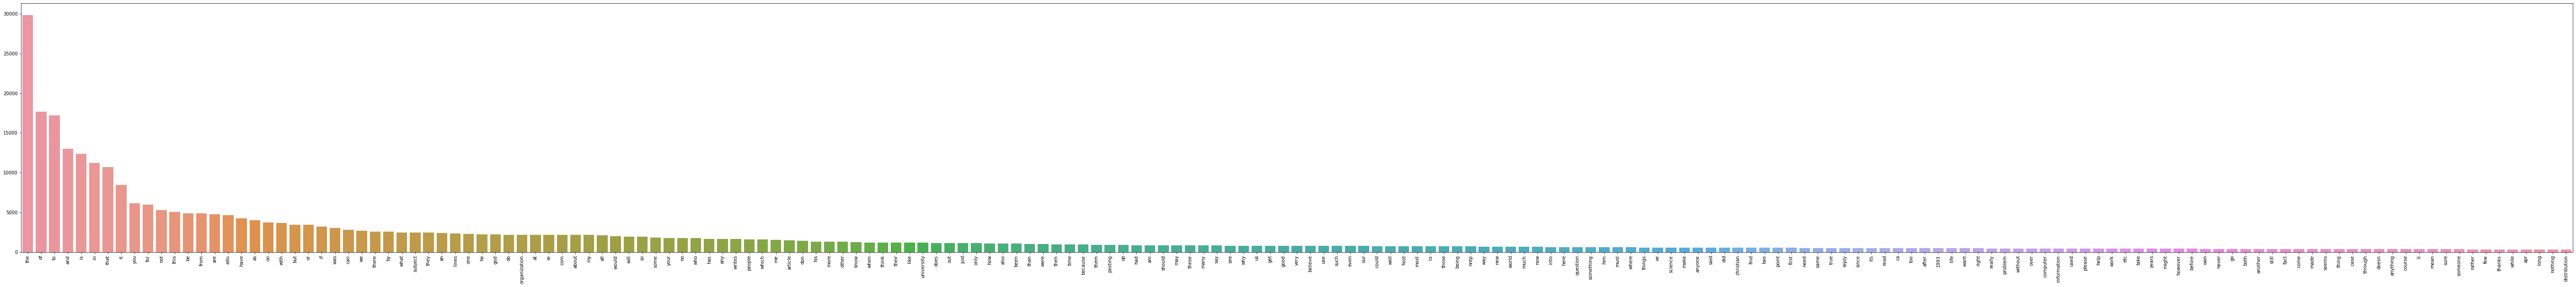

In [30]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sorted_feature_names, 
            y=sorted_term_frequencies_reduced)
g.set_xticklabels(sorted_feature_names, rotation = 90);

### >>> **Exercise 16 (take home):**

In [31]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [32]:
# Answer here
mlb_name = preprocessing.LabelBinarizer()
mlb_name.fit(X.category_name)
X['bin_category_name'] = mlb_name.transform(X['category_name']).tolist()
X.head(10)

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]  
9                 sci.med      [0, 0, 1, 0]

`LabelBinarizer` also works with categorical data in the form of strings, and as we can see from the first 10 entries, it effectively generates the same binary code.

## Part 2

### 1. The Data

Here we explore a sentiment analysis dataset created for the paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. This dataset is composed of sentences labelled positive and negative (represented as 1 and 0), gathered from Amazom, iMDB, and Yelp.

### 2. Data Preparation

In [33]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
### Begin Assignment Here
# First we import libraries we are going to use
# Rerun this cell if you have new imports

# Manually render tables
from IPython.display import display

# Helpers
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as texan

# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import nltk
import math
import random

# Scikit-learn
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, plot_roc_curve
from sklearn.preprocessing import binarize

In [35]:
# Read all three datasets, give column names as they have no header rows
header_columns = ["sentence", "emotions"]

df_amazon = pd.read_csv("sentiment_labelled_sentences/amazon_cells_labelled.txt", sep='\t', names=header_columns)
df_imdb   = pd.read_csv("sentiment_labelled_sentences/imdb_labelled.txt", sep='\t', names=header_columns)
df_yelp   = pd.read_csv("sentiment_labelled_sentences/yelp_labelled.txt", sep='\t', names=header_columns)

In [36]:
# Let's take a look at a subset of the records by printing the first three entries
display(df_amazon.head(3))
display(df_imdb.head(3))
display(df_yelp.head(3))

sentence  emotions
0  So there is no way for me to plug it in here i...         0
1                        Good case, Excellent value.         1
2                             Great for the jawbone.         1

sentence  emotions
0  A very, very, very slow-moving, aimless movie ...         0
1  Not sure who was more lost - the flat characte...         0
2  Attempting artiness with black & white and cle...         0

sentence  emotions
0                   Wow... Loved this place.         1
1                         Crust is not good.         0
2  Not tasty and the texture was just nasty.         0

In [37]:
# The size of the datasets
print(len(df_amazon.sentence), len(df_amazon.emotions))
print(len(df_imdb.sentence), len(df_imdb.emotions))
print(len(df_yelp.sentence), len(df_yelp.emotions))

1000 1000
748 748
1000 1000


In [38]:
# Let's see the labels for each dataset (first 10 rows)
print(df_amazon.emotions[:10])
print(df_imdb.emotions[:10])
print(df_yelp.emotions[:10])

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: emotions, dtype: int64
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: emotions, dtype: int64
0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    1
Name: emotions, dtype: int64


### 3. Data Transformation
#### 3.1 Some preprocessing
The following three transformations were not done in the original lab notebook, but I felt was necessary for easier analysis.

In [39]:
# Merge all dataframes into a single dataset
df_merged = pd.concat([df_amazon, df_imdb, df_yelp], ignore_index=True)

In [40]:
# Shuffle all rows and reset index
df_merged = df_merged.sample(frac=1).reset_index(drop=True)

In [41]:
# (Optional) Replace column values for sentiment with more readable strings (pos and neg)
df_merged = df_merged.replace((0, 1), ('negative', 'positive'))

#### 3.2 Familiarizing yourself with the Data

In [42]:
# We take a look at the first ten records
df_merged[0:10][['sentence', 'emotions']]

sentence  emotions
0  On the good side, the staff was genuinely plea...  positive
1  There is so much good food in Vegas that I fee...  negative
2                             The food was terrible.  negative
3  Lifetime does not air it enough, so if anyone ...  positive
4  Seller shipped quickly and much cheaper than t...  positive
5           Generally; it just lacked imagination.    negative
6                                   Nothing special.  negative
7  However, here there was no decent acting, acti...  negative
8  The majority of the Logitech earbud headsets f...  negative
9                I'll be looking for a new earpiece.  negative

In [43]:
# The last 10 records, using tail()
df_merged.tail(10)

sentence  emotions
2738                               Battery is terrible.  negative
2739                                  Will not be back!  negative
2740  The only place good for this film is in the ga...  negative
2741  Maybe if they weren't cold they would have bee...  negative
2742                First of all, it doesn't wear well.  negative
2743                                     Mediocre food.  negative
2744  I was able to do voice dialing in the car with...  positive
2745  You can not answer calls with the unit, never ...  negative
2746  The food is delicious and just spicy enough, s...  positive
2747               And those baby owls were adorable.    positive

In [44]:
# Query by position, fetching every 10th record and getting the first ten records of the result
df_merged.iloc[::10, 0:2][0:10]

sentence  emotions
0   On the good side, the staff was genuinely plea...  positive
10      Cant say enough good things about this place.  positive
20          I took back my money and got outta there.  negative
30  Phone now holds charge like it did when it was...  positive
40  The phone crashed completely and now I have to...  negative
50                          AVOID THIS ESTABLISHMENT!  negative
60  The poor batter to meat ratio made the chicken...  negative
70                          Disappointing experience.  negative
80       All in all, Ha Long Bay was a bit of a flop.  negative
90  But this understated film leaves a lasting imp...  positive

In [45]:
# using loc (by label)
df_merged.loc[::10, 'sentence'][0:10]

0     On the good side, the staff was genuinely plea...
10        Cant say enough good things about this place.
20            I took back my money and got outta there.
30    Phone now holds charge like it did when it was...
40    The phone crashed completely and now I have to...
50                            AVOID THIS ESTABLISHMENT!
60    The poor batter to meat ratio made the chicken...
70                            Disappointing experience.
80         All in all, Ha Long Bay was a bit of a flop.
90    But this understated film leaves a lasting imp...
Name: sentence, dtype: object

In [46]:
# standard querying (can't select rows and columns at the same time)
df_merged[::10][0:10]

sentence  emotions
0   On the good side, the staff was genuinely plea...  positive
10      Cant say enough good things about this place.  positive
20          I took back my money and got outta there.  negative
30  Phone now holds charge like it did when it was...  positive
40  The phone crashed completely and now I have to...  negative
50                          AVOID THIS ESTABLISHMENT!  negative
60  The poor batter to meat ratio made the chicken...  negative
70                          Disappointing experience.  negative
80       All in all, Ha Long Bay was a bit of a flop.  negative
90  But this understated film leaves a lasting imp...  positive

In [47]:
# First 10 records of negative reviews only
df_merged[df_merged['emotions'] == 'negative'].head(10)

sentence  emotions
1   There is so much good food in Vegas that I fee...  negative
2                              The food was terrible.  negative
5            Generally; it just lacked imagination.    negative
6                                    Nothing special.  negative
7   However, here there was no decent acting, acti...  negative
8   The majority of the Logitech earbud headsets f...  negative
9                 I'll be looking for a new earpiece.  negative
11  And generally the lines and plot is weaker tha...  negative
14  I've missed numerous calls because of this rea...  negative
15                Don't buy this product - It fails!.  negative

### 4. Data Mining using Pandas
#### 4.1 Missing Values

In [48]:
# Quick way to check for missing values
df_merged.isnull().sum()

sentence    0
emotions    0
dtype: int64

In [49]:
# Using the helper method
df_merged.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                            emotions
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [50]:
# Row wise
df_merged.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [51]:
# Since there are no missing values, we add our own record
dummy_rec = pd.Series(['Somebody told me to add this.', np.nan], index=['sentence', 'emotions'])
dummy_rec

sentence    Somebody told me to add this.
emotions                              NaN
dtype: object

In [52]:
df_merged_with_dummy = df_merged.append(dummy_rec, ignore_index=True)

In [53]:
print(len(df_merged), len(df_merged_with_dummy))

2748 2749


In [54]:
df_merged_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                            emotions
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [55]:
dummy_dict = [{'sentence': 'Yeah, they told me to add this too.', 'emotions': np.nan}]

In [56]:
# Add missing value record
df_merged = df_merged.append(dummy_dict, ignore_index=True)

In [57]:
len(df_merged)

2749

In [58]:
df_merged.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                            emotions
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [59]:
# Drop all NaNs in place, overwriting the original dataframe
df_merged.dropna(inplace=True)

In [60]:
df_merged.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                            emotions
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [61]:
len(df_merged)

2748

#### 4.2 Dealing with Duplicates

In [62]:
# Quick check on duplicates
df_merged.duplicated().sum()

17

In [63]:
# We don't need to add a dummy this time, let's drop the duplicates in place
df_merged.drop_duplicates(keep=False, inplace=True)

In [64]:
len(df_merged)

2714

### 5. Data Preprocessing
#### 5.1 Sampling

In [65]:
# Using random state for reproducibility, take a sample of 1000
df_sample = df_merged.sample(n=1000, random_state=42)

In [66]:
print(len(df_sample))
df_sample.head(4)

1000


sentence  emotions
512   It lasts less than 3o minutes, if I actually t...  negative
2039  I asked multiple times for the wine list and a...  negative
1928  The mic there is a joke, and the volume is qui...  negative
941   This was reflected not only in the cast, but a...  negative

<AxesSubplot:title={'center':'Sentiment distribution'}>

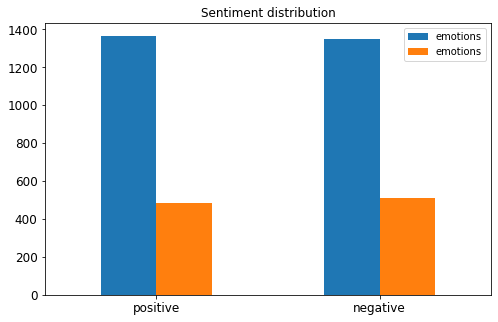

In [67]:
# We compare the value counts between the original dataset and the sampled dataset
df_value_counts = pd.concat([df_merged.emotions.value_counts(), df_sample.emotions.value_counts()], axis=1)
df_value_counts.plot(kind = 'bar',
                     title = 'Sentiment distribution',
                     rot = 0, fontsize = 12, figsize = (8,5))

#### 5.2 Feature Creation

In [68]:
# takes a like a minute or two to process
df_merged['unigrams'] = df_merged['sentence'].apply(lambda x: dmh.tokenize_text(x, True))

In [69]:
df_merged['unigrams'][0:4]

0    [good, side, ,, staff, genuinely, pleasant, en...
1    [much, good, food, Vegas, feel, cheated, wasti...
3    [Lifetime, air, enough, ,, anyone, knows, stor...
4    [Seller, shipped, quickly, much, cheaper, comp...
Name: unigrams, dtype: object

In [70]:
df_merged.head(4)

sentence  emotions  \
0  On the good side, the staff was genuinely plea...  positive   
1  There is so much good food in Vegas that I fee...  negative   
3  Lifetime does not air it enough, so if anyone ...  positive   
4  Seller shipped quickly and much cheaper than t...  positive   

                                            unigrams  
0  [good, side, ,, staff, genuinely, pleasant, en...  
1  [much, good, food, Vegas, feel, cheated, wasti...  
3  [Lifetime, air, enough, ,, anyone, knows, stor...  
4  [Seller, shipped, quickly, much, cheaper, comp...

#### 5.3 Feature Subset Selection

In [71]:
count_vect = CountVectorizer(min_df=10)
merged_counts = count_vect.fit_transform(df_merged.sentence)

In [72]:
# Let's test the vectorizer by analyzing the first sentence in the dataset
analyze = count_vect.build_analyzer()
analyze(df_merged.loc[1, 'sentence'])
#" ".join(list(X[4:5].text))

['there',
 'is',
 'so',
 'much',
 'good',
 'food',
 'in',
 'vegas',
 'that',
 'feel',
 'cheated',
 'for',
 'wasting',
 'an',
 'eating',
 'opportunity',
 'by',
 'going',
 'to',
 'rice',
 'and',
 'company']

In [73]:
# Check the size of the document term matrix and the first ten terms
print(merged_counts.shape)
count_vect.get_feature_names()

(2714, 450)


C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['10',
 'about',
 'absolutely',
 'acting',
 'actors',
 'actually',
 'after',
 'again',
 'all',
 'almost',
 'also',
 'always',
 'am',
 'amazing',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'around',
 'art',
 'as',
 'at',
 'atmosphere',
 'avoid',
 'away',
 'awesome',
 'awful',
 'back',
 'bad',
 'barely',
 'battery',
 'be',
 'beautiful',
 'because',
 'been',
 'before',
 'being',
 'believe',
 'best',
 'better',
 'between',
 'big',
 'bit',
 'black',
 'bland',
 'bluetooth',
 'boring',
 'both',
 'bought',
 'breakfast',
 'buffet',
 'burger',
 'but',
 'buy',
 'by',
 'call',
 'calls',
 'came',
 'camera',
 'can',
 'car',
 'care',
 'case',
 'cast',
 'cell',
 'certainly',
 'character',
 'characters',
 'charge',
 'charger',
 'cheap',
 'chicken',
 'clear',
 'cold',
 'come',
 'comfortable',
 'coming',
 'company',
 'completely',
 'cool',
 'could',
 'couldn',
 'crap',
 'customer',
 'day',
 'days',
 'deal',
 'definitely',
 'delicious',
 'design',
 'device',
 'dialogue',
 'did',
 

In [74]:
# First twenty terms only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df_merged.index)[0:20]] # Document indices
plot_z = merged_counts[0:20, 0:20].toarray()

In [75]:
texan.plot_heat_map(plot_x, plot_y, plot_z)

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




#### 5.4 Dimensionality Reduction

In [76]:
merged_reduced = PCA(n_components=2).fit_transform(merged_counts.toarray())
merged_reduced.shape

(2714, 2)

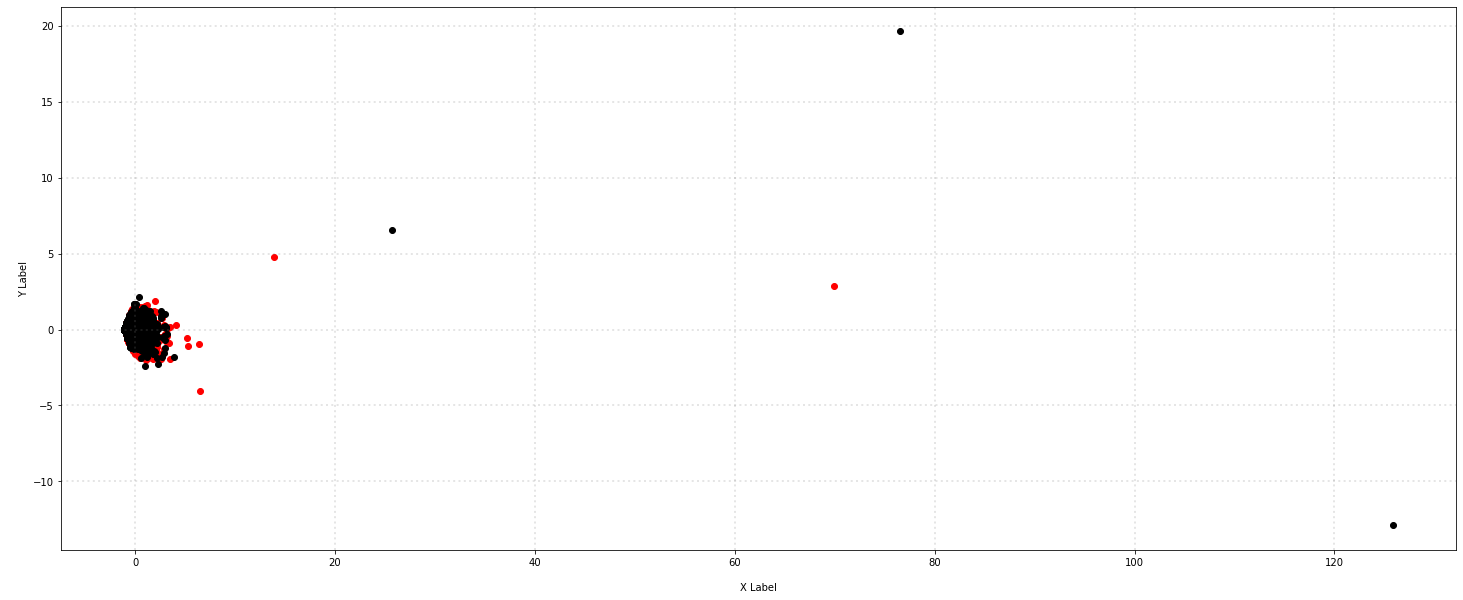

In [77]:
col = ['red', 'black']
sent = ['positive', 'negative']

# plot a 2d scatter plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, sent):
    xs = merged_reduced[df_merged['emotions'] == category].T[0]
    ys = merged_reduced[df_merged['emotions'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [78]:
merged_reduced_3d = PCA(n_components=3).fit_transform(merged_counts.toarray())

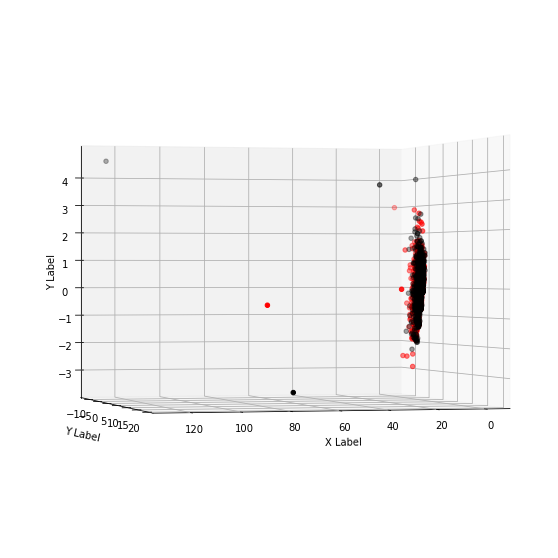

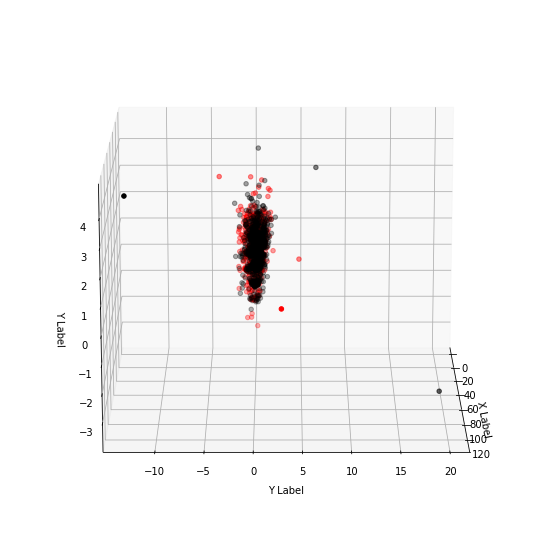

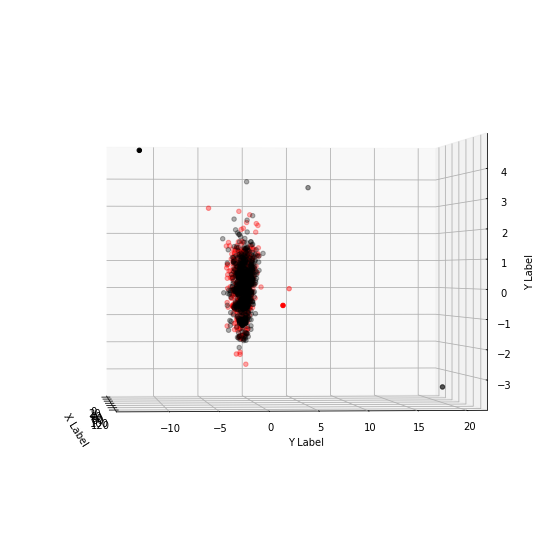

In [79]:
# plot a 3d scatter plot with three viewing angles
view_angles = [(0, 75), (15, 0), (0, -5)]

for vert, hor in view_angles:
    fig = plt.figure(figsize = (25,10))
    ax = plt.axes(projection='3d')

    for c, category in zip(col, sent):
        xs = merged_reduced_3d[df_merged['emotions'] == category].T[0]
        ys = merged_reduced_3d[df_merged['emotions'] == category].T[1]
        zs = merged_reduced_3d[df_merged['emotions'] == category].T[2]

        ax.scatter3D(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nY Label')

    ax.view_init(vert, hor)

    plt.show()

#### 5.5 Atrribute Transformation / Aggregation

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



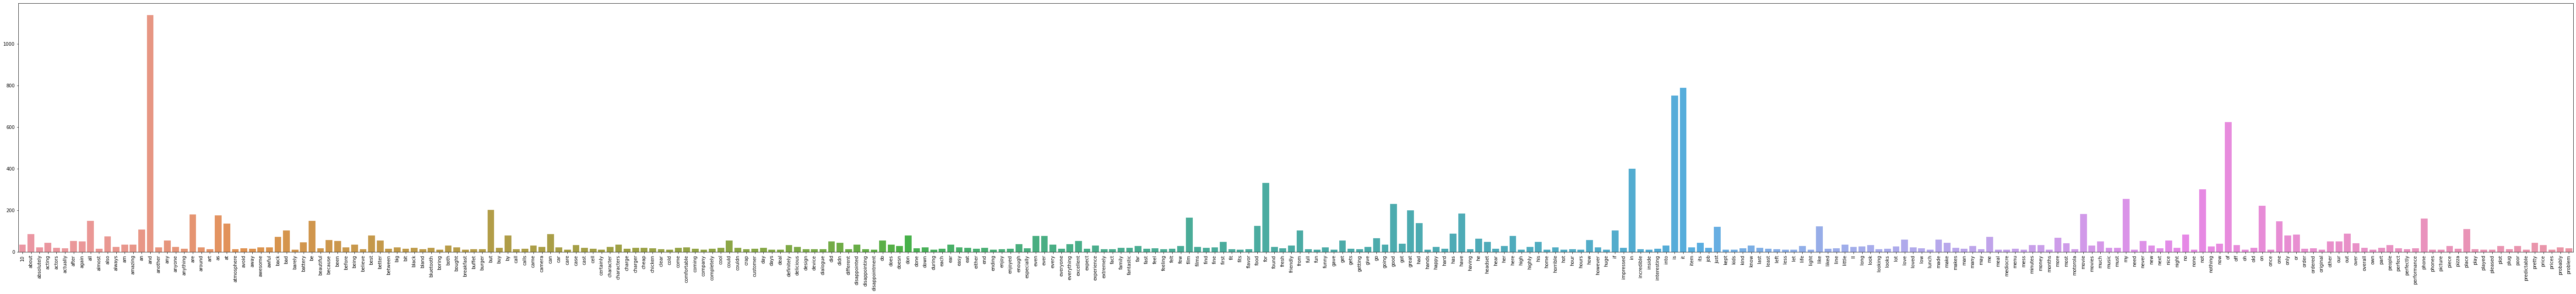

In [80]:
# get term frequencies
term_frequencies = np.asarray(merged_counts.sum(axis=0))[0]

# Plot word counts
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [81]:
sort_indices = np.argsort(term_frequencies)
sorted_term_frequencies = np.array(term_frequencies)[sort_indices]
sorted_feature_names = np.array(count_vect.get_feature_names())[sort_indices]

sorted_term_frequencies = sorted_term_frequencies[::-1]
sorted_feature_names = sorted_feature_names[::-1]

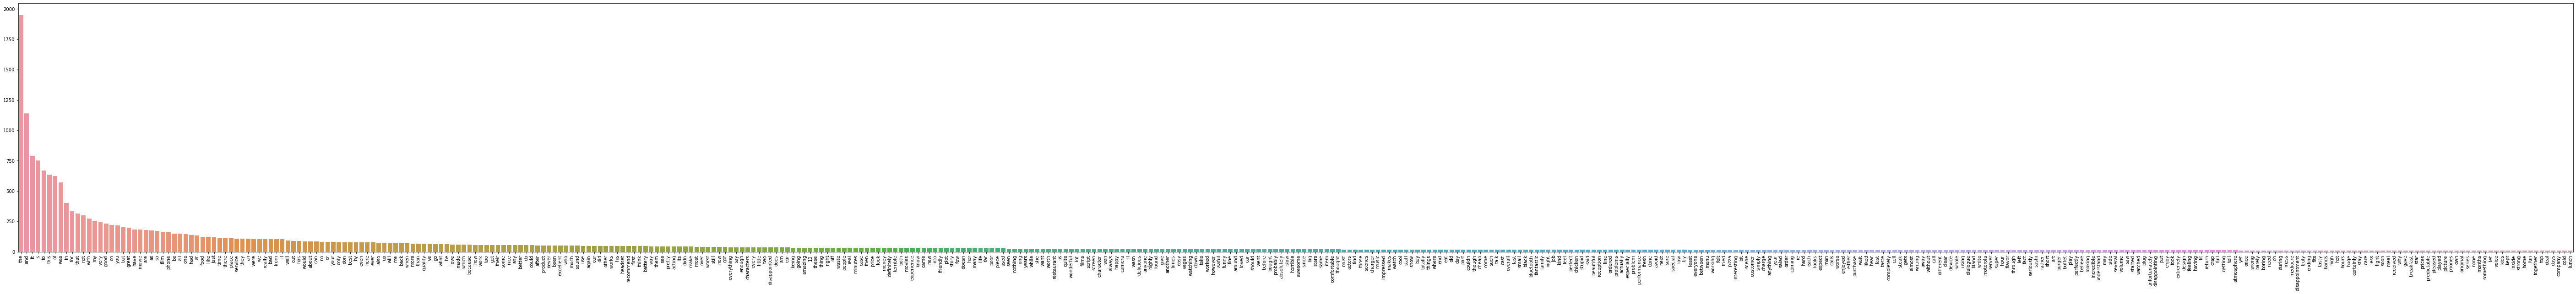

In [82]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sorted_feature_names, 
            y=sorted_term_frequencies)
g.set_xticklabels(sorted_feature_names, rotation = 90);

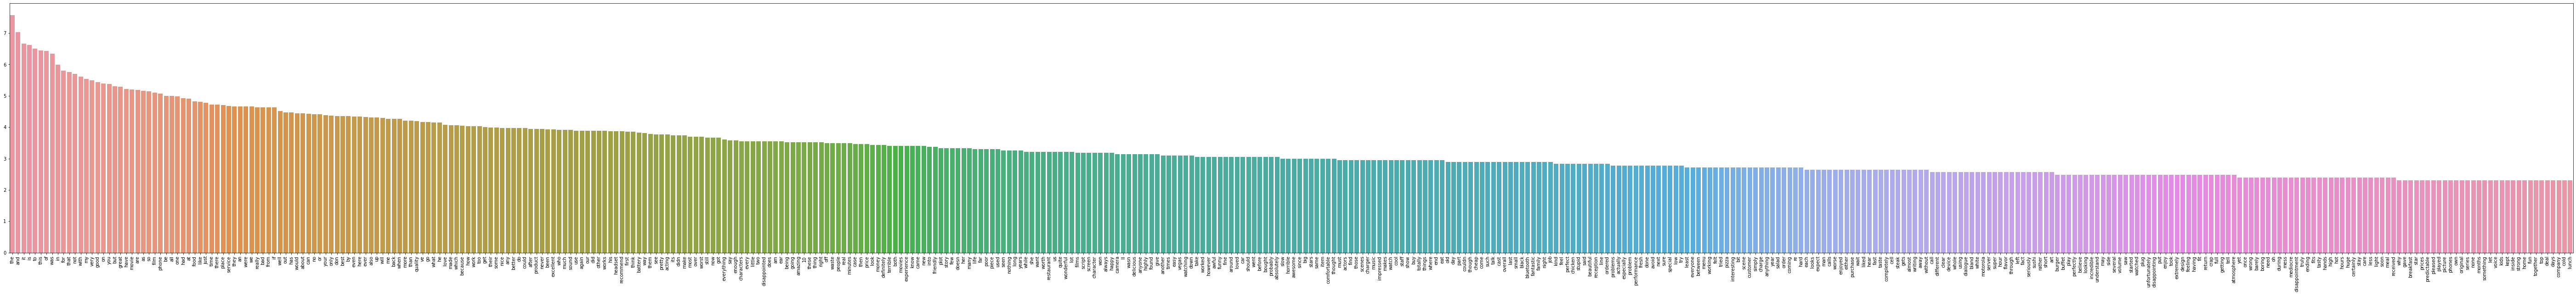

In [83]:
sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sorted_feature_names, 
            y=sorted_term_frequencies_log)
g.set_xticklabels(sorted_feature_names, rotation = 90);

#### 5.6 Discretization and Binarization

In [84]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_merged.emotions)

LabelBinarizer()

In [85]:
df_merged['emotions_category'] = mlb.transform(df_merged['emotions']).tolist()
df_merged.head(10)

sentence  emotions  \
0   On the good side, the staff was genuinely plea...  positive   
1   There is so much good food in Vegas that I fee...  negative   
3   Lifetime does not air it enough, so if anyone ...  positive   
4   Seller shipped quickly and much cheaper than t...  positive   
5            Generally; it just lacked imagination.    negative   
6                                    Nothing special.  negative   
7   However, here there was no decent acting, acti...  negative   
8   The majority of the Logitech earbud headsets f...  negative   
9                 I'll be looking for a new earpiece.  negative   
10      Cant say enough good things about this place.  positive   

                                             unigrams emotions_category  
0   [good, side, ,, staff, genuinely, pleasant, en...               [1]  
1   [much, good, food, Vegas, feel, cheated, wasti...               [0]  
3   [Lifetime, air, enough, ,, anyone, knows, stor...               [1]  
4   [Seller, shipped, quickly, much, cheaper, comp...               [1]  
5              [Generally, ;, lacked, imagination, .]               [0]  
6                               [Nothing, special, .]               [0]  
7   [However, ,, decent, acting, ,, action, locati...               [0]  
8   [majority, Logitech, earbud, headsets, failed, .]               [0]  
9                    ['ll, looking, new, earpiece, .]               [0]  
10        [Cant, say, enough, good, things, place, .]               [1]

### 6. Data Exploration

In [86]:
# We create a dict for storing results and allow looping
document = {}
names = [f"random_{x}" for x in range(1, 4)]

for name in names:
    document[name] = {'text': [df_merged.loc[random.randrange(0, len(df_merged)), 'sentence']]}

print(document)

{'random_1': {'text': ['I was deeply impressed with the character he played.  ']}, 'random_2': {'text': ['Then I exchanged for the same phone, even that had the same problem.']}, 'random_3': {'text': ['None of them are engaging or exciting.  ']}}


In [87]:
for name in names:
    document[name]['vec_count'] = count_vect.transform(document[name]['text'])
    document[name]['vec_bin'] = binarize(document[name]['vec_count'])

In [88]:
for name in names:
    print(document[name]['vec_count'].todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document['random_1']['vec_count'], document['random_2']['vec_count'], dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document['random_1']['vec_count'], document['random_3']['vec_count'], dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document['random_1']['vec_count'], document['random_1']['vec_count'], dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document['random_2']['vec_count'], document['random_2']['vec_count'], dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.195180
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part 3
### 3.1 Visualization
One of the visualizations we could do on this dataset (and is actually provided by the text_analysis helper functions) is a word cloud, which displays words with its size reflecting its frequency in the dataset. I modified the helper function for a clearer image.

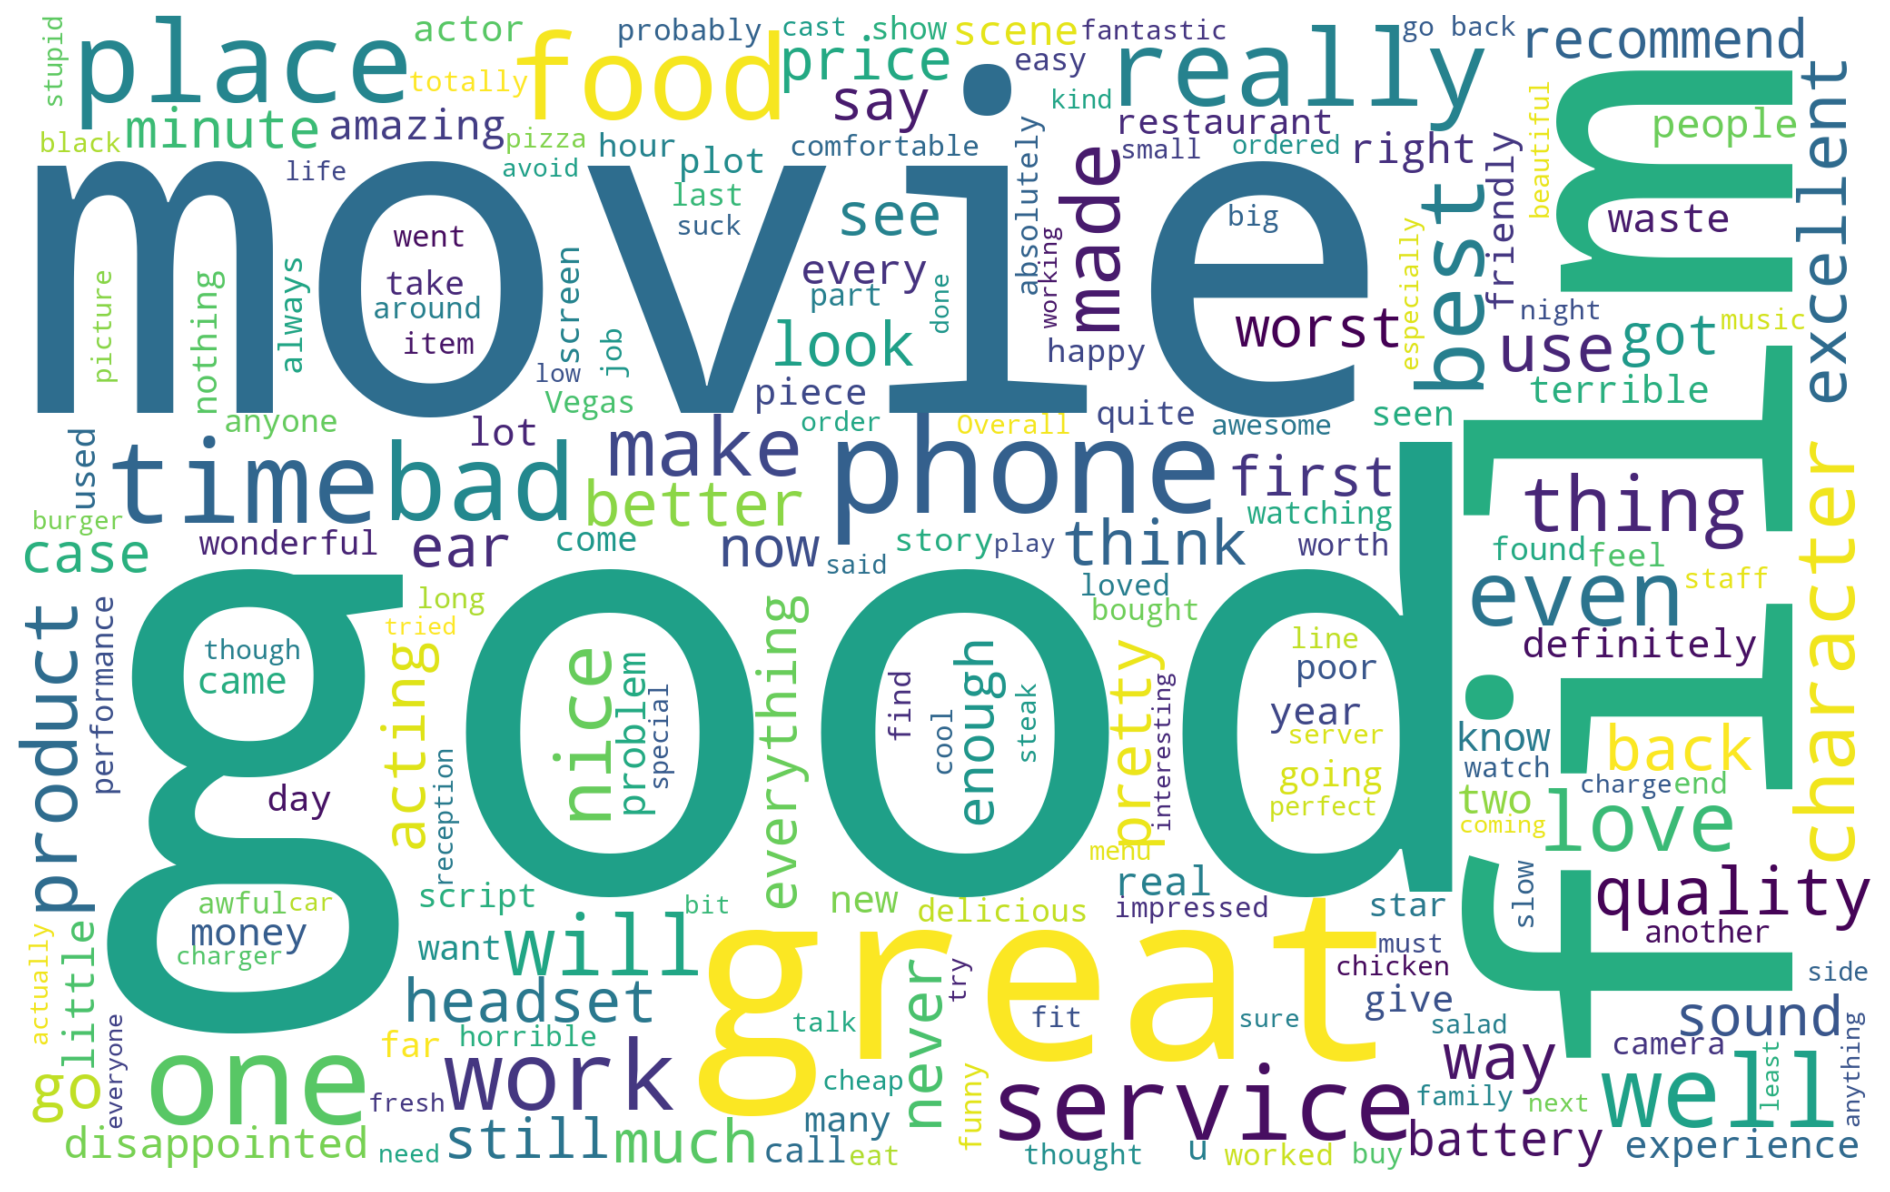

In [90]:
texan.plot_word_cloud(' '.join(df_merged.sentence))

### 3.2 TF-IDF
Term Frequency-Inverse Document Frequency evaluates the relevance of a word to a document in a set of documents. This is created by multiplying how many times a given word appears in a document with the inverse document frequency, which represents the inverse of the number of documents which contain the word. Why so? The word 'the' can appear many times in an English language text yet it does not mean the word 'the' is relevant.

In order to compare between TF-IDF and word counts, we will construct a matrix from these two methods and run them through a Naive Bayes classifier

In [91]:
# First we construct the vectorizers
tfidf_vect = TfidfVectorizer()
count_vect = CountVectorizer()

In [92]:
train_data, test_data = train_test_split(df_merged, train_size=0.8, random_state=42)

X_train_count = count_vect.fit_transform(train_data['sentence'])
X_test_count = count_vect.transform(test_data['sentence'])

X_train_tfidf = tfidf_vect.fit_transform(train_data['sentence'])
X_test_tfidf = tfidf_vect.transform(test_data['sentence'])

y_train = train_data['emotions']
y_test = test_data['emotions']

In [93]:
print('TF-IDF')
print('Shape:', X_train_tfidf.shape)
print('Feature names:', tfidf_vect.get_feature_names_out())

TF-IDF
Shape: (2171, 4551)
Feature names: ['10' '100' '11' ... 'zero' 'zombie' 'zombiez']


In [94]:
print('Count')
print('Shape:', X_train_count.shape)
print('Feature names:', count_vect.get_feature_names_out())

Count
Shape: (2171, 4551)
Feature names: ['10' '100' '11' ... 'zero' 'zombie' 'zombiez']


### 3.2 Naive Bayes Classifier
Scikit-learn offers several different kinds of Naive Bayes classifiers, Gaussian, Bernoulli, and Multinomial. Gaussian Naive Bayes classifiers are geared towards continuous data, while Multinomial Naive Bayes classifiers are more suited towards discrete counts. Finally, Bernoulli Naive Bayes classifiers are suited for binary problems which rely on the presence or absence of a feature. Since we are relying on term frequencies, Multinomial Naive Bayes is the most suitable for this problem.

In [95]:
# Use %time to compare how fast each of them run
mnb_clf_count = MultinomialNB()
%time mnb_clf_count.fit(X_train_count, y_train)

mnb_clf_tfidf = MultinomialNB()
%time mnb_clf_tfidf.fit(X_train_tfidf, y_train)

Wall time: 7.98 ms
Wall time: 11 ms


MultinomialNB()

In [96]:
# We try inferring one sentence
rand_sample = test_data.sample(n = 1)
print('Sentence:', rand_sample.iloc[0].sentence,'\nGround truth:', rand_sample.iloc[0].emotions)

count_res = mnb_clf_count.predict(count_vect.transform(rand_sample['sentence']))[0]
tfidf_res = mnb_clf_tfidf.predict(tfidf_vect.transform(rand_sample['sentence']))[0]

print('CountVectorizer-trained MNB: ', count_res)
print('TfidfVectorizer-trained MNB: ', tfidf_res)

Sentence: $50 Down the drain. 
Ground truth: negative
CountVectorizer-trained MNB:  negative
TfidfVectorizer-trained MNB:  negative


In [97]:
# Evaluate accuracy and F1 score
# F1 score covers both precision and recall
y_pred_count = mnb_clf_count.predict(X_test_count)
y_pred_tfidf = mnb_clf_tfidf.predict(X_test_tfidf)

print('Accuracy (Count):' , accuracy_score(y_pred_count, y_test))
print('Accuracy (TF-IDF):', accuracy_score(y_pred_tfidf, y_test))

print('F1 (Count):' , f1_score(y_test, y_pred_count, pos_label='positive'))
print('F1 (TF-IDF):', f1_score(y_test, y_pred_tfidf, pos_label='positive'))

Accuracy (Count): 0.8084714548802947
Accuracy (TF-IDF): 0.8397790055248618
F1 (Count): 0.8066914498141263
F1 (TF-IDF): 0.8415300546448089


C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



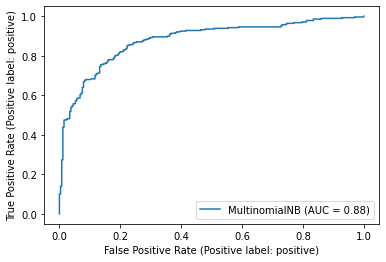

In [98]:
# Here we plot the ROC curve
# CountVectorizer
plot_roc_curve(mnb_clf_count, X_test_count, y_test)

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



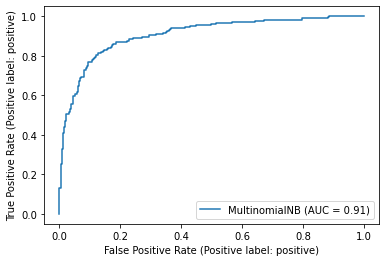

In [99]:
# TfidfVectorizer
plot_roc_curve(mnb_clf_tfidf, X_test_tfidf, y_test)

## Part 4

There are a few things that could be improved from the base code:

**Preparation**

1. Exploratory data analysis could have been done more thoroughly instead of just looking at the shape of the data and querying random records. We could, for instance, take a closer look at the representation of the data

2. To get the first or last few records, using the DataFrame methods .head() and .tail() would be preferable readability-wise instead of slicing

**Preprocessing**

   This code snippet:

   ```py
   term_frequencies = []
   for j in range(0,X_counts.shape[1]):
       term_frequencies.append(sum(X_counts[:,j].toarray()))
   ```
   could simply be replaced with the code below it:

   ```py
   term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
   ```

   As it runs much faster compared to the loop.

**Visualization**

There are more visualizations out there that are better suited to text data.